In [14]:
#------------------------------mlp-LSTM- GRU- Tracking Models--------------------------

In [2]:
import numpy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt


#From Pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix


#From Keras
from keras.models import Sequential, load_model 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM,GRU


#From sklearn 
from sklearn import preprocessing  
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_absolute_error,mean_squared_error 
from sklearn.model_selection import train_test_split  

from math import sqrt


#Import Files
import math
import time
import pandas as pd #define the data structures
import matplotlib as plt #for visualization
import numpy
import numpy as np #for matrix multiplication
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
import seaborn as sns
import plotly.offline as py
import os 
import matplotlib.pyplot as plt


from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler #for normalizing our data(scaling)
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split   


from math import sqrt
from numpy import concatenate 
from datetime import datetime
from pandas.plotting import scatter_matrix
from timeit import default_timer as timer

from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split   
from sklearn.metrics import mean_absolute_error,mean_squared_error 

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout


#Import others
py.init_notebook_mode(connected=True)
get_ipython().run_line_magic('matplotlib', 'inline')

Using TensorFlow backend.


In [39]:
#--------------------Read Data------------

In [40]:
#import or read the datasets
df2= pd.read_csv('TrackDataAllReduced.csv',index_col=0)
#df2=df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1)
df2.head()

,UserCode,UAV1,UAV2,UAV3,AP1,AP2,AP3,AP4,AP5,AP6,...,AP29,AP30,CH1,CH2,CH3,CH4,CH5,Hight,X,Y
1.0,101.0,-49.5,-64.4,-67.4,-0.52,6.70,-1.39,0.64,0.29,-0.60,...,0.05,0.04,157.0,157.0,157.0,157.0,157.0,60.0,200.0,1.0
2.0,101.0,-49.1,-66.6,-72.6,3.42,1.83,-1.63,-0.37,-0.30,0.03,...,0.03,-0.16,7.0,157.0,7.0,7.0,157.0,60.0,197.0,1.0
3.0,101.0,-52.9,-67.9,-75.9,4.55,3.17,0.08,0.69,0.63,-0.51,...,-0.23,-0.15,7.0,7.0,7.0,7.0,157.0,60.0,194.0,1.0
4.0,101.0,-49.5,-67.5,-72.5,3.25,2.06,-0.88,0.80,0.31,-0.11,...,0.01,-0.09,7.0,7.0,157.0,1.0,7.0,60.0,191.0,1.0
5.0,101.0,-50.0,-66.1,-76.1,5.04,1.39,-0.57,-0.03,-0.10,-0.15,...,0.09,0.07,7.0,1.0,157.0,7.0,2.0,60.0,188.0,1.0


In [41]:
Y=df2.iloc[:,-2:]
X=df2.iloc[:,:-2]

# conversion to numpy array
x, y = X.values, Y.values  

# scaling values for model
x_scale = MinMaxScaler()
y_scale = MinMaxScaler() 


X = x_scale.fit_transform(x)
Y = y_scale.fit_transform(y)   
print(len(X),len(Y))

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05) 
#print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

23445 23445


In [42]:
X_train, y_train= X, Y 
print(X_train.shape, y_train.shape)

(23445, 40) (23445, 2)


In [43]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [44]:
#import or read the datasets
pred = pd.read_csv('TestReduced.csv',index_col=0)
#pred=pred2.drop(pred2.columns[pred2.columns.str.contains('unnamed',case = False)],axis = 1)
pred.head()

,UserCode,UAV1,UAV2,UAV3,AP1,AP2,AP3,AP4,AP5,AP6,...,AP29,AP30,CH1,CH2,CH3,CH4,CH5,Hight,X,Y
1,104,-48.3,-74.7,-67.0,7.53,0.62,1.51,0.68,-0.02,-0.65,...,-0.26,-0.17,1,11,153,6,6,40,1,6
2,104,-54.3,-82.1,-78.6,6.16,-0.31,-0.08,0.62,0.34,-1.20,...,-0.21,0.50,1,11,6,3,8,40,1,12
3,111,-82.1,-70.8,-80.8,7.73,-0.28,1.25,0.18,-1.15,0.30,...,0.50,-0.35,1,1,1,1,6,60,1,15
4,103,-76.5,-78.8,-82.8,6.97,-0.23,-0.17,2.18,0.08,-0.98,...,0.34,-0.86,3,3,3,3,100,60,1,21
5,115,-48.3,-75.6,-73.5,5.17,1.16,0.96,1.47,1.43,-0.37,...,-0.33,-0.58,11,11,1,153,2,40,1,24


In [45]:
X_pred=pred.iloc[:,:-2]
Y_pred=pred.iloc[:,-2:]
x_pred, y_pred = X_pred.values, Y_pred.values  

# scaling values for model
x_pred_scale = MinMaxScaler()
y_pred_scale = MinMaxScaler() 

Xx__pred = x_pred_scale.fit_transform(x_pred)
Yy_pred = y_pred_scale.fit_transform(y_pred) 

C:\Users\Abebe Belay\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [46]:
pred_x = np.reshape(Xx__pred, (Xx__pred.shape[0], 1, Xx__pred.shape[1])) 
pred_x

array([[[0.21428571, 0.75877193, 0.17165669, ..., 0.02941176,
         0.03030303, 0.        ]],

       [[0.21428571, 0.62719298, 0.0239521 , ..., 0.01176471,
         0.04242424, 0.        ]],

       [[0.71428571, 0.01754386, 0.249501  , ..., 0.        ,
         0.03030303, 1.        ]],

       ...,

       [[0.5       , 0.73684211, 0.58283433, ..., 0.92941176,
         0.10909091, 0.        ]],

       [[1.        , 0.75877193, 0.67664671, ..., 0.88235294,
         0.69090909, 1.        ]],

       [[0.42857143, 0.75877193, 0.66866267, ..., 0.81176471,
         0.95757576, 1.        ]]])

In [47]:
#-----------------------------GRU model defining--------------------------------

In [48]:
def gru(feature):
    input_shapes=(None, feature)
    
    print(input_shapes)
    model_name3 = 'Tracking_GRU_' 
    model3='gru'
    model3 = Sequential()
    model3.add(GRU(units=512, return_sequences=True, input_shape=input_shapes))
    model3.add(Dropout(0.2))
    model3.add(GRU(units=256,return_sequences=True))
    model3.add(Dropout(0.2))
    model3.add(GRU(units=256))
    model3.add(Dropout(0.2))
    model3.add(Dense(2, activation='tanh'))
    #model.add(Dense(4, activation='relu'))
    #model.add(Dense(4, activation='softmax'))
    model3.compile(loss='MAE', optimizer='adam', metrics=['accuracy']) 
    #model.compile(loss='mse',optimizer='rmsprop')
    #model.compile(loss='mse', optimizer='sgd') 
    return model3

In [49]:
def gru(feature):
    input_shapes=(None, feature)
    
    print(input_shapes)
    model_name4 = 'Tracking_GRU_' 
    model4='gru'
    model4 = Sequential()
    model4.add(GRU(units=512, return_sequences=True, input_shape=input_shapes))
    model4.add(Dropout(0.2))
    model4.add(GRU(units=256,return_sequences=True))
    model4.add(Dropout(0.2))
    model4.add(GRU(units=256))
    model4.add(Dropout(0.2))
    model4.add(Dense(2, activation='tanh'))
    #model.add(Dense(4, activation='relu'))
    #model.add(Dense(4, activation='softmax'))
    model4.compile(loss='MAE', optimizer='sgd', metrics=['accuracy']) 
    #model.compile(loss='mse',optimizer='rmsprop')
    #model.compile(loss='mse', optimizer='sgd') 
    return model4

In [50]:
def gru(feature):
    input_shapes=(None, feature)
    
    print(input_shapes)
    model_name5 = 'Tracking_GRU_' 
    model5='gru'
    model5 = Sequential()
    model5.add(GRU(units=512, return_sequences=True, input_shape=input_shapes))
    model5.add(Dropout(0.2))
    model5.add(GRU(units=256,return_sequences=True))
    model5.add(Dropout(0.2))
    model5.add(GRU(units=256))
    model5.add(Dropout(0.2))
    model5.add(Dense(2, activation='tanh'))
    #model.add(Dense(4, activation='relu'))
    #model.add(Dense(4, activation='softmax'))
    model5.compile(loss='MAE', optimizer='Rmsprop', metrics=['accuracy']) 
    #model.compile(loss='mse',optimizer='rmsprop')
    #model.compile(loss='mse', optimizer='sgd') 
    return model5

In [51]:
def gru(feature):
    input_shapes=(None, feature)
    
    print(input_shapes)
    model_name6 = 'Tracking_GRU_' 
    model6='gru'
    model6 = Sequential()
    model6.add(GRU(units=512, return_sequences=True, input_shape=input_shapes))
    model6.add(Dropout(0.2))
    model6.add(GRU(units=256,return_sequences=True))
    model6.add(Dropout(0.2))
    model6.add(GRU(units=256))
    model6.add(Dropout(0.2))
    model6.add(Dense(2, activation='tanh'))
    #model.add(Dense(4, activation='relu'))
    #model.add(Dense(4, activation='softmax'))
    model6.compile(loss='MAE', optimizer='adamax', metrics=['accuracy']) 
    #model.compile(loss='mse',optimizer='rmsprop')
    #model.compile(loss='mse', optimizer='sgd') 
    return model6

In [52]:
model3=gru(X_train.shape[2])
model3.summary()

(None, 40)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_46 (GRU)                 (None, None, 512)         849408    
_________________________________________________________________
dropout_46 (Dropout)         (None, None, 512)         0         
_________________________________________________________________
gru_47 (GRU)                 (None, None, 256)         590592    
_________________________________________________________________
dropout_47 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
gru_48 (GRU)                 (None, 256)               393984    
_________________________________________________________________
dropout_48 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 514       

In [53]:
model4=gru(X_train.shape[2])
model4.summary()

(None, 40)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_49 (GRU)                 (None, None, 512)         849408    
_________________________________________________________________
dropout_49 (Dropout)         (None, None, 512)         0         
_________________________________________________________________
gru_50 (GRU)                 (None, None, 256)         590592    
_________________________________________________________________
dropout_50 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
gru_51 (GRU)                 (None, 256)               393984    
_________________________________________________________________
dropout_51 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 514       

In [54]:
model5=gru(X_train.shape[2])
model5.summary()

(None, 40)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_52 (GRU)                 (None, None, 512)         849408    
_________________________________________________________________
dropout_52 (Dropout)         (None, None, 512)         0         
_________________________________________________________________
gru_53 (GRU)                 (None, None, 256)         590592    
_________________________________________________________________
dropout_53 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
gru_54 (GRU)                 (None, 256)               393984    
_________________________________________________________________
dropout_54 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 514       

In [55]:
model6=gru(X_train.shape[2])
model6.summary()

(None, 40)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_55 (GRU)                 (None, None, 512)         849408    
_________________________________________________________________
dropout_55 (Dropout)         (None, None, 512)         0         
_________________________________________________________________
gru_56 (GRU)                 (None, None, 256)         590592    
_________________________________________________________________
dropout_56 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
gru_57 (GRU)                 (None, 256)               393984    
_________________________________________________________________
dropout_57 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 514       

In [56]:
##Fitting the GRU to the Training set
hist3=model3.fit(X_train, y_train, batch_size=300, epochs=500, validation_split=0.05, verbose=1)

Train on 22272 samples, validate on 1173 samples
Epoch 1/500
22272/22272 [==============================] - 23s 1ms/step - loss: 0.2314 - acc: 0.7501 - val_loss: 0.2247 - val_acc: 0.7298
Epoch 2/500
22272/22272 [==============================] - 12s 533us/step - loss: 0.2076 - acc: 0.7468 - val_loss: 0.2075 - val_acc: 0.7246
Epoch 3/500
22272/22272 [==============================] - 11s 515us/step - loss: 0.2005 - acc: 0.7500 - val_loss: 0.2049 - val_acc: 0.7340
Epoch 4/500
22272/22272 [==============================] - 11s 511us/step - loss: 0.1990 - acc: 0.7522 - val_loss: 0.2048 - val_acc: 0.7315
Epoch 5/500
22272/22272 [==============================] - 12s 520us/step - loss: 0.1976 - acc: 0.7530 - val_loss: 0.2070 - val_acc: 0.7494
Epoch 6/500
22272/22272 [==============================] - 12s 517us/step - loss: 0.1967 - acc: 0.7554 - val_loss: 0.2001 - val_acc: 0.7289
Epoch 7/500
22272/22272 [==============================] - 11s 511us/step - loss: 0.1949 - acc: 0.7550 - val_loss

Epoch 59/500
22272/22272 [==============================] - 11s 510us/step - loss: 0.1321 - acc: 0.8474 - val_loss: 0.1347 - val_acc: 0.8244
Epoch 60/500
22272/22272 [==============================] - 11s 499us/step - loss: 0.1315 - acc: 0.8453 - val_loss: 0.1293 - val_acc: 0.8474
Epoch 61/500
22272/22272 [==============================] - 11s 493us/step - loss: 0.1297 - acc: 0.8510 - val_loss: 0.1298 - val_acc: 0.8508
Epoch 62/500
22272/22272 [==============================] - 11s 490us/step - loss: 0.1291 - acc: 0.8500 - val_loss: 0.1315 - val_acc: 0.8355
Epoch 63/500
22272/22272 [==============================] - 11s 490us/step - loss: 0.1289 - acc: 0.8521 - val_loss: 0.1270 - val_acc: 0.8483
Epoch 64/500
22272/22272 [==============================] - 11s 490us/step - loss: 0.1274 - acc: 0.8556 - val_loss: 0.1316 - val_acc: 0.8440
Epoch 65/500
22272/22272 [==============================] - 11s 496us/step - loss: 0.1257 - acc: 0.8577 - val_loss: 0.1240 - val_acc: 0.8542
Epoch 66/500


Epoch 117/500
22272/22272 [==============================] - 11s 506us/step - loss: 0.0943 - acc: 0.9094 - val_loss: 0.0912 - val_acc: 0.9003
Epoch 118/500
22272/22272 [==============================] - 11s 500us/step - loss: 0.0941 - acc: 0.9089 - val_loss: 0.0951 - val_acc: 0.8994
Epoch 119/500
22272/22272 [==============================] - 11s 494us/step - loss: 0.0943 - acc: 0.9067 - val_loss: 0.0971 - val_acc: 0.8934
Epoch 120/500
22272/22272 [==============================] - 11s 494us/step - loss: 0.0931 - acc: 0.9098 - val_loss: 0.0952 - val_acc: 0.8986
Epoch 121/500
22272/22272 [==============================] - 11s 494us/step - loss: 0.0920 - acc: 0.9099 - val_loss: 0.0906 - val_acc: 0.8994
Epoch 122/500
22272/22272 [==============================] - 11s 498us/step - loss: 0.0913 - acc: 0.9143 - val_loss: 0.0911 - val_acc: 0.8977
Epoch 123/500
22272/22272 [==============================] - 11s 502us/step - loss: 0.0917 - acc: 0.9112 - val_loss: 0.0915 - val_acc: 0.9011
Epoch 

Epoch 175/500
22272/22272 [==============================] - 11s 493us/step - loss: 0.0755 - acc: 0.9343 - val_loss: 0.0754 - val_acc: 0.9216
Epoch 176/500
22272/22272 [==============================] - 11s 499us/step - loss: 0.0750 - acc: 0.9357 - val_loss: 0.0758 - val_acc: 0.9190
Epoch 177/500
22272/22272 [==============================] - 11s 503us/step - loss: 0.0754 - acc: 0.9342 - val_loss: 0.0733 - val_acc: 0.9275
Epoch 178/500
22272/22272 [==============================] - 11s 495us/step - loss: 0.0747 - acc: 0.9345 - val_loss: 0.0762 - val_acc: 0.9190
Epoch 179/500
22272/22272 [==============================] - 11s 496us/step - loss: 0.0746 - acc: 0.9347 - val_loss: 0.0794 - val_acc: 0.9216
Epoch 180/500
22272/22272 [==============================] - 11s 500us/step - loss: 0.0743 - acc: 0.9349 - val_loss: 0.0761 - val_acc: 0.9233
Epoch 181/500
22272/22272 [==============================] - 11s 498us/step - loss: 0.0743 - acc: 0.9366 - val_loss: 0.0751 - val_acc: 0.9199
Epoch 

Epoch 233/500
22272/22272 [==============================] - 11s 501us/step - loss: 0.0643 - acc: 0.9490 - val_loss: 0.0642 - val_acc: 0.9403
Epoch 234/500
22272/22272 [==============================] - 11s 502us/step - loss: 0.0634 - acc: 0.9495 - val_loss: 0.0655 - val_acc: 0.9250
Epoch 235/500
22272/22272 [==============================] - 11s 496us/step - loss: 0.0640 - acc: 0.9492 - val_loss: 0.0616 - val_acc: 0.9361
Epoch 236/500
22272/22272 [==============================] - 11s 495us/step - loss: 0.0638 - acc: 0.9500 - val_loss: 0.0636 - val_acc: 0.9361
Epoch 237/500
22272/22272 [==============================] - 11s 496us/step - loss: 0.0637 - acc: 0.9484 - val_loss: 0.0632 - val_acc: 0.9361
Epoch 238/500
22272/22272 [==============================] - 11s 505us/step - loss: 0.0641 - acc: 0.9470 - val_loss: 0.0631 - val_acc: 0.9318
Epoch 239/500
22272/22272 [==============================] - 12s 523us/step - loss: 0.0640 - acc: 0.9467 - val_loss: 0.0643 - val_acc: 0.9395
Epoch 

Epoch 291/500
22272/22272 [==============================] - 11s 496us/step - loss: 0.0574 - acc: 0.9545 - val_loss: 0.0552 - val_acc: 0.9446
Epoch 292/500
22272/22272 [==============================] - 11s 500us/step - loss: 0.0572 - acc: 0.9576 - val_loss: 0.0558 - val_acc: 0.9471
Epoch 293/500
22272/22272 [==============================] - 11s 497us/step - loss: 0.0573 - acc: 0.9563 - val_loss: 0.0555 - val_acc: 0.9454
Epoch 294/500
22272/22272 [==============================] - 11s 494us/step - loss: 0.0575 - acc: 0.9564 - val_loss: 0.0567 - val_acc: 0.9454
Epoch 295/500
22272/22272 [==============================] - 11s 492us/step - loss: 0.0570 - acc: 0.9568 - val_loss: 0.0562 - val_acc: 0.9369
Epoch 296/500
22272/22272 [==============================] - 11s 492us/step - loss: 0.0573 - acc: 0.9564 - val_loss: 0.0565 - val_acc: 0.9446
Epoch 297/500
22272/22272 [==============================] - 11s 500us/step - loss: 0.0569 - acc: 0.9565 - val_loss: 0.0553 - val_acc: 0.9446
Epoch 

Epoch 349/500
22272/22272 [==============================] - 11s 490us/step - loss: 0.0530 - acc: 0.9613 - val_loss: 0.0517 - val_acc: 0.9497
Epoch 350/500
22272/22272 [==============================] - 11s 489us/step - loss: 0.0526 - acc: 0.9621 - val_loss: 0.0516 - val_acc: 0.9540
Epoch 351/500
22272/22272 [==============================] - 11s 496us/step - loss: 0.0524 - acc: 0.9600 - val_loss: 0.0501 - val_acc: 0.9523
Epoch 352/500
22272/22272 [==============================] - 11s 501us/step - loss: 0.0525 - acc: 0.9619 - val_loss: 0.0533 - val_acc: 0.9506
Epoch 353/500
22272/22272 [==============================] - 11s 495us/step - loss: 0.0522 - acc: 0.9615 - val_loss: 0.0521 - val_acc: 0.9480
Epoch 354/500
22272/22272 [==============================] - 11s 490us/step - loss: 0.0522 - acc: 0.9614 - val_loss: 0.0506 - val_acc: 0.9514
Epoch 355/500
22272/22272 [==============================] - 11s 488us/step - loss: 0.0520 - acc: 0.9612 - val_loss: 0.0521 - val_acc: 0.9497
Epoch 

Epoch 407/500
22272/22272 [==============================] - 11s 496us/step - loss: 0.0494 - acc: 0.9655 - val_loss: 0.0485 - val_acc: 0.9480
Epoch 408/500
22272/22272 [==============================] - 11s 489us/step - loss: 0.0490 - acc: 0.9648 - val_loss: 0.0481 - val_acc: 0.9523
Epoch 409/500
22272/22272 [==============================] - 11s 487us/step - loss: 0.0490 - acc: 0.9638 - val_loss: 0.0488 - val_acc: 0.9488
Epoch 410/500
22272/22272 [==============================] - 11s 492us/step - loss: 0.0489 - acc: 0.9630 - val_loss: 0.0485 - val_acc: 0.9574
Epoch 411/500
22272/22272 [==============================] - 11s 497us/step - loss: 0.0487 - acc: 0.9659 - val_loss: 0.0480 - val_acc: 0.9574
Epoch 412/500
22272/22272 [==============================] - 11s 507us/step - loss: 0.0490 - acc: 0.9648 - val_loss: 0.0489 - val_acc: 0.9531
Epoch 413/500
22272/22272 [==============================] - 11s 495us/step - loss: 0.0487 - acc: 0.9657 - val_loss: 0.0486 - val_acc: 0.9540
Epoch 

Epoch 465/500
22272/22272 [==============================] - 11s 495us/step - loss: 0.0463 - acc: 0.9658 - val_loss: 0.0452 - val_acc: 0.9574
Epoch 466/500
22272/22272 [==============================] - 11s 491us/step - loss: 0.0464 - acc: 0.9670 - val_loss: 0.0452 - val_acc: 0.9625
Epoch 467/500
22272/22272 [==============================] - 11s 490us/step - loss: 0.0466 - acc: 0.9673 - val_loss: 0.0464 - val_acc: 0.9540
Epoch 468/500
22272/22272 [==============================] - 11s 490us/step - loss: 0.0463 - acc: 0.9672 - val_loss: 0.0473 - val_acc: 0.9582
Epoch 469/500
22272/22272 [==============================] - 11s 506us/step - loss: 0.0464 - acc: 0.9690 - val_loss: 0.0460 - val_acc: 0.9548
Epoch 470/500
22272/22272 [==============================] - 11s 498us/step - loss: 0.0465 - acc: 0.9674 - val_loss: 0.0454 - val_acc: 0.9591
Epoch 471/500
22272/22272 [==============================] - 11s 501us/step - loss: 0.0462 - acc: 0.9681 - val_loss: 0.0456 - val_acc: 0.9616
Epoch 

In [57]:
##Fitting the GRU to the Training set
hist4=model4.fit(X_train, y_train, batch_size=300, epochs=500, validation_split=0.05, verbose=1)

Train on 22272 samples, validate on 1173 samples
Epoch 1/500
22272/22272 [==============================] - 15s 658us/step - loss: 0.2354 - acc: 0.7479 - val_loss: 0.2244 - val_acc: 0.7298
Epoch 2/500
22272/22272 [==============================] - 11s 499us/step - loss: 0.2090 - acc: 0.7491 - val_loss: 0.2107 - val_acc: 0.7298
Epoch 3/500
22272/22272 [==============================] - 11s 494us/step - loss: 0.2015 - acc: 0.7500 - val_loss: 0.2061 - val_acc: 0.7383
Epoch 4/500
22272/22272 [==============================] - 11s 500us/step - loss: 0.1978 - acc: 0.7535 - val_loss: 0.2062 - val_acc: 0.7442
Epoch 5/500
22272/22272 [==============================] - 11s 498us/step - loss: 0.1978 - acc: 0.7530 - val_loss: 0.2022 - val_acc: 0.7332
Epoch 6/500
22272/22272 [==============================] - 12s 526us/step - loss: 0.1971 - acc: 0.7552 - val_loss: 0.2022 - val_acc: 0.7357
Epoch 7/500
22272/22272 [==============================] - 12s 559us/step - loss: 0.1952 - acc: 0.7562 - val_lo

22272/22272 [==============================] - 14s 608us/step - loss: 0.0953 - acc: 0.9040 - val_loss: 0.1004 - val_acc: 0.8900
Epoch 116/500
22272/22272 [==============================] - 13s 601us/step - loss: 0.0948 - acc: 0.9041 - val_loss: 0.0926 - val_acc: 0.89173 -  - ETA: 8s - loss: 0. - ETA:
Epoch 117/500
22272/22272 [==============================] - 13s 589us/step - loss: 0.0946 - acc: 0.9049 - val_loss: 0.0975 - val_acc: 0.8986
Epoch 118/500
22272/22272 [==============================] - 13s 604us/step - loss: 0.0943 - acc: 0.9084 - val_loss: 0.0926 - val_acc: 0.9003
Epoch 119/500
22272/22272 [==============================] - 13s 604us/step - loss: 0.0937 - acc: 0.9093 - val_loss: 0.0906 - val_acc: 0.9054
Epoch 120/500
22272/22272 [==============================] - 13s 600us/step - loss: 0.0927 - acc: 0.9075 - val_loss: 0.0952 - val_acc: 0.8994
Epoch 121/500
22272/22272 [==============================] - 13s 596us/step - loss: 0.0925 - acc: 0.9081 - val_loss: 0.0920 - val_

22272/22272 [==============================] - 11s 508us/step - loss: 0.0655 - acc: 0.9473 - val_loss: 0.0654 - val_acc: 0.9344
Epoch 229/500
22272/22272 [==============================] - 11s 510us/step - loss: 0.0651 - acc: 0.9462 - val_loss: 0.0644 - val_acc: 0.9327
Epoch 230/500
22272/22272 [==============================] - 12s 543us/step - loss: 0.0652 - acc: 0.9441 - val_loss: 0.0624 - val_acc: 0.9361
Epoch 231/500
22272/22272 [==============================] - 13s 570us/step - loss: 0.0645 - acc: 0.9472 - val_loss: 0.0630 - val_acc: 0.9454
Epoch 232/500
22272/22272 [==============================] - 13s 576us/step - loss: 0.0642 - acc: 0.9485 - val_loss: 0.0663 - val_acc: 0.9309
Epoch 233/500
22272/22272 [==============================] - 11s 511us/step - loss: 0.0651 - acc: 0.9468 - val_loss: 0.0625 - val_acc: 0.9335
Epoch 234/500
22272/22272 [==============================] - 11s 500us/step - loss: 0.0637 - acc: 0.9472 - val_loss: 0.0637 - val_acc: 0.9361
Epoch 235/500
22272/

Epoch 286/500
22272/22272 [==============================] - 15s 652us/step - loss: 0.0577 - acc: 0.9563 - val_loss: 0.0556 - val_acc: 0.9497
Epoch 287/500
22272/22272 [==============================] - 15s 658us/step - loss: 0.0580 - acc: 0.9554 - val_loss: 0.0575 - val_acc: 0.9471
Epoch 288/500
22272/22272 [==============================] - 15s 668us/step - loss: 0.0578 - acc: 0.9548 - val_loss: 0.0569 - val_acc: 0.9506
Epoch 289/500
22272/22272 [==============================] - 15s 661us/step - loss: 0.0578 - acc: 0.9535 - val_loss: 0.0563 - val_acc: 0.9437
Epoch 290/500
22272/22272 [==============================] - 15s 686us/step - loss: 0.0574 - acc: 0.9543 - val_loss: 0.0550 - val_acc: 0.9497
Epoch 291/500
22272/22272 [==============================] - 15s 671us/step - loss: 0.0572 - acc: 0.9570 - val_loss: 0.0570 - val_acc: 0.9480
Epoch 292/500
22272/22272 [==============================] - 15s 666us/step - loss: 0.0575 - acc: 0.9573 - val_loss: 0.0575 - val_acc: 0.9437
Epoch 

22272/22272 [==============================] - 14s 633us/step - loss: 0.0496 - acc: 0.9654 - val_loss: 0.0493 - val_acc: 0.9582
Epoch 401/500
22272/22272 [==============================] - 13s 605us/step - loss: 0.0497 - acc: 0.9624 - val_loss: 0.0489 - val_acc: 0.95910s - loss: 0.0496 - acc: 0.
Epoch 402/500
22272/22272 [==============================] - 14s 609us/step - loss: 0.0494 - acc: 0.9621 - val_loss: 0.0485 - val_acc: 0.9591
Epoch 403/500
22272/22272 [==============================] - 14s 613us/step - loss: 0.0494 - acc: 0.9646 - val_loss: 0.0472 - val_acc: 0.9565: 0.0493 - a
Epoch 404/500
22272/22272 [==============================] - 14s 619us/step - loss: 0.0492 - acc: 0.9645 - val_loss: 0.0470 - val_acc: 0.9557
Epoch 405/500
22272/22272 [==============================] - 14s 608us/step - loss: 0.0490 - acc: 0.9653 - val_loss: 0.0480 - val_acc: 0.9608
Epoch 406/500
22272/22272 [==============================] - 14s 615us/step - loss: 0.0489 - acc: 0.9635 - val_loss: 0.0473

In [58]:
##Fitting the GRU to the Training set
hist5=model5.fit(X_train, y_train, batch_size=300, epochs=500, validation_split=0.05, verbose=1)

Train on 22272 samples, validate on 1173 samples
Epoch 1/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.2302 - acc: 0.7488 - val_loss: 0.2179 - val_acc: 0.7263
Epoch 2/500
22272/22272 [==============================] - 11s 497us/step - loss: 0.2048 - acc: 0.7485 - val_loss: 0.2056 - val_acc: 0.7340
Epoch 3/500
22272/22272 [==============================] - 11s 496us/step - loss: 0.1993 - acc: 0.7517 - val_loss: 0.2055 - val_acc: 0.7366
Epoch 4/500
22272/22272 [==============================] - 11s 503us/step - loss: 0.1989 - acc: 0.7515 - val_loss: 0.2035 - val_acc: 0.7315
Epoch 5/500
22272/22272 [==============================] - 11s 498us/step - loss: 0.1964 - acc: 0.7537 - val_loss: 0.2057 - val_acc: 0.7425
Epoch 6/500
22272/22272 [==============================] - 11s 504us/step - loss: 0.1970 - acc: 0.7549 - val_loss: 0.2024 - val_acc: 0.7460
Epoch 7/500
22272/22272 [==============================] - 11s 510us/step - loss: 0.1955 - acc: 0.7557 - val_lo

Epoch 59/500
22272/22272 [==============================] - 11s 511us/step - loss: 0.1296 - acc: 0.8495 - val_loss: 0.1336 - val_acc: 0.8346
Epoch 60/500
22272/22272 [==============================] - 11s 506us/step - loss: 0.1295 - acc: 0.8531 - val_loss: 0.1314 - val_acc: 0.8406
Epoch 61/500
22272/22272 [==============================] - 11s 500us/step - loss: 0.1282 - acc: 0.8530 - val_loss: 0.1317 - val_acc: 0.8423
Epoch 62/500
22272/22272 [==============================] - 11s 498us/step - loss: 0.1271 - acc: 0.8559 - val_loss: 0.1292 - val_acc: 0.8389
Epoch 63/500
22272/22272 [==============================] - 11s 504us/step - loss: 0.1265 - acc: 0.8565 - val_loss: 0.1263 - val_acc: 0.8500
Epoch 64/500
22272/22272 [==============================] - 11s 512us/step - loss: 0.1266 - acc: 0.8539 - val_loss: 0.1295 - val_acc: 0.8440
Epoch 65/500
22272/22272 [==============================] - 11s 504us/step - loss: 0.1247 - acc: 0.8596 - val_loss: 0.1234 - val_acc: 0.8559
Epoch 66/500


Epoch 117/500
22272/22272 [==============================] - 11s 499us/step - loss: 0.0935 - acc: 0.9080 - val_loss: 0.0937 - val_acc: 0.9079
Epoch 118/500
22272/22272 [==============================] - 12s 518us/step - loss: 0.0922 - acc: 0.9104 - val_loss: 0.0958 - val_acc: 0.8934
Epoch 119/500
22272/22272 [==============================] - 11s 504us/step - loss: 0.0923 - acc: 0.9102 - val_loss: 0.0924 - val_acc: 0.9011
Epoch 120/500
22272/22272 [==============================] - 11s 500us/step - loss: 0.0918 - acc: 0.9105 - val_loss: 0.0931 - val_acc: 0.9122
Epoch 121/500
22272/22272 [==============================] - 11s 504us/step - loss: 0.0913 - acc: 0.9118 - val_loss: 0.0876 - val_acc: 0.9037
Epoch 122/500
22272/22272 [==============================] - 11s 505us/step - loss: 0.0902 - acc: 0.9149 - val_loss: 0.0901 - val_acc: 0.9088
Epoch 123/500
22272/22272 [==============================] - 11s 507us/step - loss: 0.0906 - acc: 0.9118 - val_loss: 0.0912 - val_acc: 0.9020
Epoch 

Epoch 175/500
22272/22272 [==============================] - 11s 498us/step - loss: 0.0753 - acc: 0.9350 - val_loss: 0.0735 - val_acc: 0.9241
Epoch 176/500
22272/22272 [==============================] - 11s 502us/step - loss: 0.0745 - acc: 0.9354 - val_loss: 0.0782 - val_acc: 0.9275
Epoch 177/500
22272/22272 [==============================] - 11s 498us/step - loss: 0.0747 - acc: 0.9357 - val_loss: 0.0755 - val_acc: 0.9216
Epoch 178/500
22272/22272 [==============================] - 11s 515us/step - loss: 0.0742 - acc: 0.9352 - val_loss: 0.0727 - val_acc: 0.9318
Epoch 179/500
22272/22272 [==============================] - 11s 513us/step - loss: 0.0737 - acc: 0.9376 - val_loss: 0.0735 - val_acc: 0.9267
Epoch 180/500
22272/22272 [==============================] - 11s 498us/step - loss: 0.0742 - acc: 0.9369 - val_loss: 0.0765 - val_acc: 0.9250
Epoch 181/500
22272/22272 [==============================] - 11s 501us/step - loss: 0.0731 - acc: 0.9365 - val_loss: 0.0735 - val_acc: 0.9267
Epoch 

Epoch 233/500
22272/22272 [==============================] - 11s 497us/step - loss: 0.0642 - acc: 0.9481 - val_loss: 0.0649 - val_acc: 0.9344
Epoch 234/500
22272/22272 [==============================] - 11s 498us/step - loss: 0.0644 - acc: 0.9487 - val_loss: 0.0643 - val_acc: 0.9344
Epoch 235/500
22272/22272 [==============================] - 11s 503us/step - loss: 0.0643 - acc: 0.9476 - val_loss: 0.0648 - val_acc: 0.9309
Epoch 236/500
22272/22272 [==============================] - 11s 507us/step - loss: 0.0645 - acc: 0.9468 - val_loss: 0.0651 - val_acc: 0.9344
Epoch 237/500
22272/22272 [==============================] - 12s 539us/step - loss: 0.0642 - acc: 0.9477 - val_loss: 0.0640 - val_acc: 0.9369
Epoch 238/500
22272/22272 [==============================] - 12s 545us/step - loss: 0.0639 - acc: 0.9476 - val_loss: 0.0631 - val_acc: 0.9412
Epoch 239/500
22272/22272 [==============================] - 11s 507us/step - loss: 0.0639 - acc: 0.9481 - val_loss: 0.0627 - val_acc: 0.9361
Epoch 

Epoch 291/500
22272/22272 [==============================] - 11s 506us/step - loss: 0.0574 - acc: 0.9556 - val_loss: 0.0595 - val_acc: 0.9412
Epoch 292/500
22272/22272 [==============================] - 11s 515us/step - loss: 0.0577 - acc: 0.9522 - val_loss: 0.0567 - val_acc: 0.9386
Epoch 293/500
22272/22272 [==============================] - 11s 507us/step - loss: 0.0573 - acc: 0.9571 - val_loss: 0.0579 - val_acc: 0.9429
Epoch 294/500
22272/22272 [==============================] - 12s 522us/step - loss: 0.0577 - acc: 0.9542 - val_loss: 0.0562 - val_acc: 0.9352
Epoch 295/500
22272/22272 [==============================] - 11s 499us/step - loss: 0.0572 - acc: 0.9566 - val_loss: 0.0559 - val_acc: 0.9403
Epoch 296/500
22272/22272 [==============================] - 12s 518us/step - loss: 0.0572 - acc: 0.9551 - val_loss: 0.0566 - val_acc: 0.9471
Epoch 297/500
22272/22272 [==============================] - 12s 524us/step - loss: 0.0569 - acc: 0.9564 - val_loss: 0.0586 - val_acc: 0.9420
Epoch 

Epoch 406/500
22272/22272 [==============================] - 16s 702us/step - loss: 0.0492 - acc: 0.9643 - val_loss: 0.0491 - val_acc: 0.9497
Epoch 407/500
22272/22272 [==============================] - 16s 726us/step - loss: 0.0493 - acc: 0.9624 - val_loss: 0.0480 - val_acc: 0.9523
Epoch 408/500
22272/22272 [==============================] - 16s 700us/step - loss: 0.0493 - acc: 0.9639 - val_loss: 0.0480 - val_acc: 0.9540
Epoch 409/500
22272/22272 [==============================] - 15s 696us/step - loss: 0.0492 - acc: 0.9641 - val_loss: 0.0489 - val_acc: 0.9523
Epoch 410/500
22272/22272 [==============================] - 17s 741us/step - loss: 0.0492 - acc: 0.9643 - val_loss: 0.0495 - val_acc: 0.9480
Epoch 411/500
22272/22272 [==============================] - 16s 726us/step - loss: 0.0492 - acc: 0.9640 - val_loss: 0.0497 - val_acc: 0.9540
Epoch 412/500
22272/22272 [==============================] - 16s 716us/step - loss: 0.0490 - acc: 0.9639 - val_loss: 0.0489 - val_acc: 0.9514
Epoch 

Epoch 464/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.0463 - acc: 0.9675 - val_loss: 0.0481 - val_acc: 0.9506
Epoch 465/500
22272/22272 [==============================] - 16s 697us/step - loss: 0.0470 - acc: 0.9646 - val_loss: 0.0481 - val_acc: 0.9531
Epoch 466/500
22272/22272 [==============================] - 16s 708us/step - loss: 0.0467 - acc: 0.9671 - val_loss: 0.0463 - val_acc: 0.9599
Epoch 467/500
22272/22272 [==============================] - 16s 712us/step - loss: 0.0463 - acc: 0.9682 - val_loss: 0.0474 - val_acc: 0.9591
Epoch 468/500
22272/22272 [==============================] - 17s 745us/step - loss: 0.0466 - acc: 0.9680 - val_loss: 0.0471 - val_acc: 0.9574
Epoch 469/500
22272/22272 [==============================] - 16s 716us/step - loss: 0.0469 - acc: 0.9653 - val_loss: 0.0475 - val_acc: 0.9540
Epoch 470/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0459 - acc: 0.9656 - val_loss: 0.0477 - val_acc: 0.9480
Epoch 

In [59]:
##Fitting the GRU to the Training set
hist6=model6.fit(X_train, y_train, batch_size=300, epochs=500, validation_split=0.05, verbose=1)

Train on 22272 samples, validate on 1173 samples
Epoch 1/500
22272/22272 [==============================] - 17s 747us/step - loss: 0.2305 - acc: 0.7509 - val_loss: 0.2229 - val_acc: 0.7298
Epoch 2/500
22272/22272 [==============================] - 12s 561us/step - loss: 0.2060 - acc: 0.7458 - val_loss: 0.2075 - val_acc: 0.7263
Epoch 3/500
22272/22272 [==============================] - 11s 512us/step - loss: 0.1998 - acc: 0.7513 - val_loss: 0.2035 - val_acc: 0.7298
Epoch 4/500
22272/22272 [==============================] - 12s 518us/step - loss: 0.1983 - acc: 0.7527 - val_loss: 0.2034 - val_acc: 0.7272
Epoch 5/500
22272/22272 [==============================] - 12s 530us/step - loss: 0.1980 - acc: 0.7519 - val_loss: 0.2115 - val_acc: 0.7451
Epoch 6/500
22272/22272 [==============================] - 12s 539us/step - loss: 0.1967 - acc: 0.7555 - val_loss: 0.2020 - val_acc: 0.7349
Epoch 7/500
22272/22272 [==============================] - 12s 519us/step - loss: 0.1960 - acc: 0.7544 - val_lo

22272/22272 [==============================] - 12s 555us/step - loss: 0.0948 - acc: 0.9073 - val_loss: 0.0933 - val_acc: 0.9011
Epoch 117/500
22272/22272 [==============================] - 13s 563us/step - loss: 0.0946 - acc: 0.9051 - val_loss: 0.0956 - val_acc: 0.8968
Epoch 118/500
22272/22272 [==============================] - 14s 628us/step - loss: 0.0939 - acc: 0.9072 - val_loss: 0.0959 - val_acc: 0.9037
Epoch 119/500
22272/22272 [==============================] - 14s 618us/step - loss: 0.0932 - acc: 0.9071 - val_loss: 0.0949 - val_acc: 0.9028
Epoch 120/500
22272/22272 [==============================] - 14s 615us/step - loss: 0.0929 - acc: 0.9100 - val_loss: 0.0918 - val_acc: 0.9096
Epoch 121/500
22272/22272 [==============================] - 13s 586us/step - loss: 0.0930 - acc: 0.9066 - val_loss: 0.0944 - val_acc: 0.8968
Epoch 122/500
22272/22272 [==============================] - 13s 573us/step - loss: 0.0921 - acc: 0.9133 - val_loss: 0.0939 - val_acc: 0.8977
Epoch 123/500
22272/

Epoch 231/500
22272/22272 [==============================] - 12s 545us/step - loss: 0.0654 - acc: 0.9466 - val_loss: 0.0635 - val_acc: 0.9420
Epoch 232/500
22272/22272 [==============================] - 13s 570us/step - loss: 0.0650 - acc: 0.9464 - val_loss: 0.0653 - val_acc: 0.9378
Epoch 233/500
22272/22272 [==============================] - 13s 576us/step - loss: 0.0652 - acc: 0.9465 - val_loss: 0.0654 - val_acc: 0.9395
Epoch 234/500
22272/22272 [==============================] - 12s 540us/step - loss: 0.0638 - acc: 0.9468 - val_loss: 0.0647 - val_acc: 0.9403
Epoch 235/500
22272/22272 [==============================] - 12s 547us/step - loss: 0.0645 - acc: 0.9489 - val_loss: 0.0636 - val_acc: 0.9429
Epoch 236/500
22272/22272 [==============================] - 12s 526us/step - loss: 0.0647 - acc: 0.9482 - val_loss: 0.0672 - val_acc: 0.9420
Epoch 237/500
22272/22272 [==============================] - 11s 511us/step - loss: 0.0646 - acc: 0.9475 - val_loss: 0.0633 - val_acc: 0.9386
Epoch 

Epoch 289/500
22272/22272 [==============================] - 12s 557us/step - loss: 0.0578 - acc: 0.9554 - val_loss: 0.0578 - val_acc: 0.9471
Epoch 290/500
22272/22272 [==============================] - 13s 590us/step - loss: 0.0577 - acc: 0.9559 - val_loss: 0.0564 - val_acc: 0.9471
Epoch 291/500
22272/22272 [==============================] - 13s 603us/step - loss: 0.0575 - acc: 0.9561 - val_loss: 0.0592 - val_acc: 0.9480
Epoch 292/500
22272/22272 [==============================] - 13s 583us/step - loss: 0.0579 - acc: 0.9559 - val_loss: 0.0604 - val_acc: 0.9480
Epoch 293/500
22272/22272 [==============================] - 12s 542us/step - loss: 0.0575 - acc: 0.9555 - val_loss: 0.0564 - val_acc: 0.9514
Epoch 294/500
22272/22272 [==============================] - 13s 593us/step - loss: 0.0566 - acc: 0.9560 - val_loss: 0.0566 - val_acc: 0.9412
Epoch 295/500
22272/22272 [==============================] - 13s 574us/step - loss: 0.0577 - acc: 0.9538 - val_loss: 0.0560 - val_acc: 0.9497
Epoch 

Epoch 347/500
22272/22272 [==============================] - 12s 547us/step - loss: 0.0534 - acc: 0.9581 - val_loss: 0.0516 - val_acc: 0.9548
Epoch 348/500
22272/22272 [==============================] - 12s 517us/step - loss: 0.0531 - acc: 0.9613 - val_loss: 0.0531 - val_acc: 0.9531
Epoch 349/500
22272/22272 [==============================] - 12s 550us/step - loss: 0.0532 - acc: 0.9605 - val_loss: 0.0525 - val_acc: 0.9540
Epoch 350/500
22272/22272 [==============================] - 12s 544us/step - loss: 0.0525 - acc: 0.9610 - val_loss: 0.0530 - val_acc: 0.9514
Epoch 351/500
22272/22272 [==============================] - 13s 590us/step - loss: 0.0525 - acc: 0.9618 - val_loss: 0.0533 - val_acc: 0.9514
Epoch 352/500
22272/22272 [==============================] - 13s 585us/step - loss: 0.0527 - acc: 0.9599 - val_loss: 0.0545 - val_acc: 0.9506
Epoch 353/500
22272/22272 [==============================] - 12s 548us/step - loss: 0.0527 - acc: 0.9620 - val_loss: 0.0523 - val_acc: 0.9548
Epoch 

Epoch 405/500
22272/22272 [==============================] - 13s 564us/step - loss: 0.0496 - acc: 0.9636 - val_loss: 0.0473 - val_acc: 0.9582
Epoch 406/500
22272/22272 [==============================] - 11s 516us/step - loss: 0.0494 - acc: 0.9623 - val_loss: 0.0493 - val_acc: 0.9625
Epoch 407/500
22272/22272 [==============================] - 12s 530us/step - loss: 0.0502 - acc: 0.9612 - val_loss: 0.0480 - val_acc: 0.9540
Epoch 408/500
22272/22272 [==============================] - 12s 539us/step - loss: 0.0494 - acc: 0.9626 - val_loss: 0.0487 - val_acc: 0.9531
Epoch 409/500
22272/22272 [==============================] - 12s 527us/step - loss: 0.0495 - acc: 0.9654 - val_loss: 0.0473 - val_acc: 0.9625
Epoch 410/500
22272/22272 [==============================] - 11s 515us/step - loss: 0.0488 - acc: 0.9627 - val_loss: 0.0497 - val_acc: 0.9616
Epoch 411/500
22272/22272 [==============================] - 12s 545us/step - loss: 0.0491 - acc: 0.9653 - val_loss: 0.0473 - val_acc: 0.9591
Epoch 

Epoch 463/500
22272/22272 [==============================] - 12s 529us/step - loss: 0.0464 - acc: 0.9667 - val_loss: 0.0455 - val_acc: 0.9608
Epoch 464/500
22272/22272 [==============================] - 12s 523us/step - loss: 0.0466 - acc: 0.9672 - val_loss: 0.0466 - val_acc: 0.9599
Epoch 465/500
22272/22272 [==============================] - 11s 505us/step - loss: 0.0469 - acc: 0.9648 - val_loss: 0.0456 - val_acc: 0.9642
Epoch 466/500
22272/22272 [==============================] - 11s 509us/step - loss: 0.0466 - acc: 0.9681 - val_loss: 0.0449 - val_acc: 0.9591
Epoch 467/500
22272/22272 [==============================] - 11s 508us/step - loss: 0.0460 - acc: 0.9648 - val_loss: 0.0455 - val_acc: 0.9591
Epoch 468/500
22272/22272 [==============================] - 11s 515us/step - loss: 0.0466 - acc: 0.9662 - val_loss: 0.0454 - val_acc: 0.9591
Epoch 469/500
22272/22272 [==============================] - 11s 514us/step - loss: 0.0463 - acc: 0.9659 - val_loss: 0.0463 - val_acc: 0.9633
Epoch 

In [60]:
#Getting the predicted locations 
from timeit import default_timer as timer
start3 = timer()
pred_gru3=model3.predict(pred_x)
duration3 = timer() - start3
print('The computational time of GRU model is :-', duration3)

predictions_trans2=y_scale.inverse_transform(pred_gru3)

The computational time of GRU model is :- 2.1706716410268663


In [3]:
#Performance Evaluations in 3 hiden layers
print("RMSE:", sqrt(mean_squared_error(pred_gru3,Yy_pred)))
print("MAE:", mean_absolute_error(pred_gru3,Yy_pred))

NameError: name 'pred_gru3' is not defined

In [61]:
#Getting the predicted locations 
from timeit import default_timer as timer
start4 = timer()
pred_gru4=model4.predict(pred_x)
duration4 = timer() - start4
print('The computational time of GRU model is :-', duration4)

predictions_trans4=y_scale.inverse_transform(pred_gru4)

The computational time of GRU model is :- 1.2381122234775694


In [62]:
#Getting the predicted locations 
from timeit import default_timer as timer
start5 = timer()
pred_gru5=model5.predict(pred_x)
duration5 = timer() - start5
print('The computational time of GRU model is :-', duration5)

predictions_trans5=y_scale.inverse_transform(pred_gru5)

The computational time of GRU model is :- 1.4357265615133348


In [63]:
#Getting the predicted locations 
from timeit import default_timer as timer
start6 = timer()
pred_gru6=model6.predict(pred_x)
duration6 = timer() - start6
print('The computational time of GRU model is :-', duration6)

predictions_trans6=y_scale.inverse_transform(pred_gru6)

The computational time of GRU model is :- 1.1507548580225215


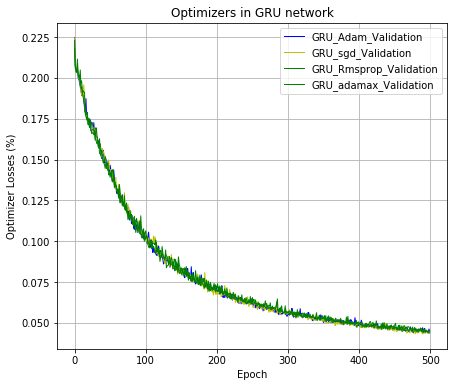

In [68]:
#Loss graph 
plt.figure(figsize=(7,6))
#plt.plot(hist3.history['loss'], 'r-', linewidth=1)
plt.plot(hist3.history['val_loss'],'B', linewidth=1)


#plt.plot(hist4.history['loss'],'k', linewidth=1)
plt.plot(hist4.history['val_loss'],'y', linewidth=1)


#plt.plot(hist5.history['loss'],'m', linewidth=1)
plt.plot(hist5.history['val_loss'],'g', linewidth=1)

#plt.plot(hist6.history['loss'],'m', linewidth=1)
plt.plot(hist6.history['val_loss'],'g', linewidth=1)

plt.title("Optimizers in GRU network")
plt.ylabel('Optimizer Losses (%)')
plt.xlabel('Epoch')
plt.legend(['GRU_Adam_Validation', 'GRU_sgd_Validation', 'GRU_Rmsprop_Validation', 'GRU_adamax_Validation'], loc='upper right')
plt.grid(True)
plt.savefig('MLP_LSTM_GRU_Trackloss.png', format='png', dpi=1200)
plt.show()

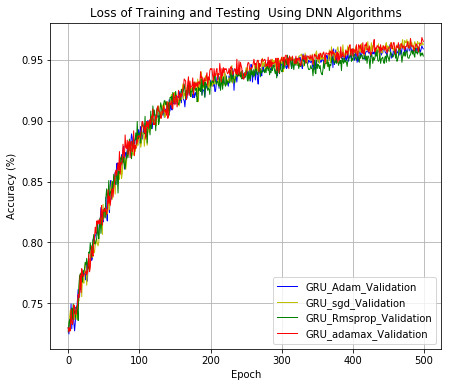

In [72]:
#Performance Graph
plt.figure(figsize=(7,6))
#plt.plot(hist1.history['acc'], 'r-', linewidth=1)
plt.plot(hist3.history['val_acc'],'B', linewidth=1)


#plt.plot(hist2.history['acc'],'k', linewidth=2)
plt.plot(hist4.history['val_acc'],'y', linewidth=1)


#plt.plot(hist3.history['acc'],'m', linewidth=2)
plt.plot(hist5.history['val_acc'],'g', linewidth=1)

plt.plot(hist6.history['val_acc'],'r', linewidth=1)


plt.title("Loss of Training and Testing  Using DNN Algorithms")
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['GRU_Adam_Validation', 'GRU_sgd_Validation', 'GRU_Rmsprop_Validation', 'GRU_adamax_Validation'], loc='lower right')
plt.grid(True)
plt.savefig('MLP_LSTM_GRU_Track.png', format='png', dpi=1200)
plt.show()